In [1]:
import torch
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
%matplotlib inline

In [38]:
words=open("names.txt",'r').read().splitlines()

In [3]:
chars=sorted(list(set(''.join(words))))   
stoi={s: i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
block_size=3
x,y=[],[]
for w in words:
    context=[0]*block_size
    for ch in w+'.':
        ix=stoi[ch]
        x.append(context)
        y.append(ix)
        #print(''.join(itos[i] for i in context),'---->',itos[ix])
        context=context[1:]+[ix]

x=torch.tensor(x)
y=torch.tensor(y)    


In [5]:
def create_dataset(words):
    block_size=3
    x,y=[],[]
    for w in words:
        context=[0]*block_size
        for ch in w+'.':
            ix=stoi[ch]
            x.append(context)
            y.append(ix)
            #print(''.join(itos[i] for i in context),'---->',itos[ix])
            context=context[1:]+[ix]

    x=torch.tensor(x)
    y=torch.tensor(y)

    return x,y  

import random 
random.seed(32)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

xtr,ytr=create_dataset(words[:n1])
xdev,ydev=create_dataset(words[n1:n2])
xte,yte=create_dataset(words[n2:])

In [6]:
x.shape,x.dtype,y.shape,y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [10]:
g=torch.Generator().manual_seed(2147483647)
c=torch.randn((27,10),generator=g)
w1=torch.randn((30,200),generator=g)
b1=torch.randn((200,),generator=g)
w2=torch.randn((200,27),generator=g)
b2=torch.randn((27,),generator=g)
para=[c,w1,b2,w2,b2]

In [11]:
for i in para:
    i.requires_grad=True

In [12]:
sum([i.nelement() for i in para])
    

11724

In [13]:
ix=torch.randint(0,xtr.shape[0],(32,))
emb=c[xtr[ix]]
emb.shape

torch.Size([32, 3, 10])

In [21]:
for i in range(50000):
    ix=torch.randint(0,xtr.shape[0],(32,))
    emb=c[xtr[ix]]
    h=torch.tanh(emb.view(-1,30)@w1+b1)
    logits=h@w2+b2
    loss=F.cross_entropy(logits,ytr[ix])
    for p in para:
        p.grad=None
    loss.backward()
    
    for i in para:
        i.data+=-0.01*i.grad
print(loss)

tensor(1.6516, grad_fn=<NllLossBackward0>)


In [22]:
emb=c[xtr]
h=torch.tanh(emb.view(-1,30)@w1+b1)
logits=h@w2+b2
loss=F.cross_entropy(logits,ytr)
loss

tensor(2.1202, grad_fn=<NllLossBackward0>)

In [23]:
emb=c[xdev]
h=torch.tanh(emb.view(-1,30)@w1+b1)
logits=h@w2+b2 
loss=F.cross_entropy(logits,ydev)
loss


tensor(2.1515, grad_fn=<NllLossBackward0>)

In [185]:
emb=c[xte]
h=torch.tanh(emb.view(-1,30)@w1+b1)
logits=h@w2+b2 
loss=F.cross_entropy(logits,yte)
loss

tensor(2.1456, grad_fn=<NllLossBackward0>)

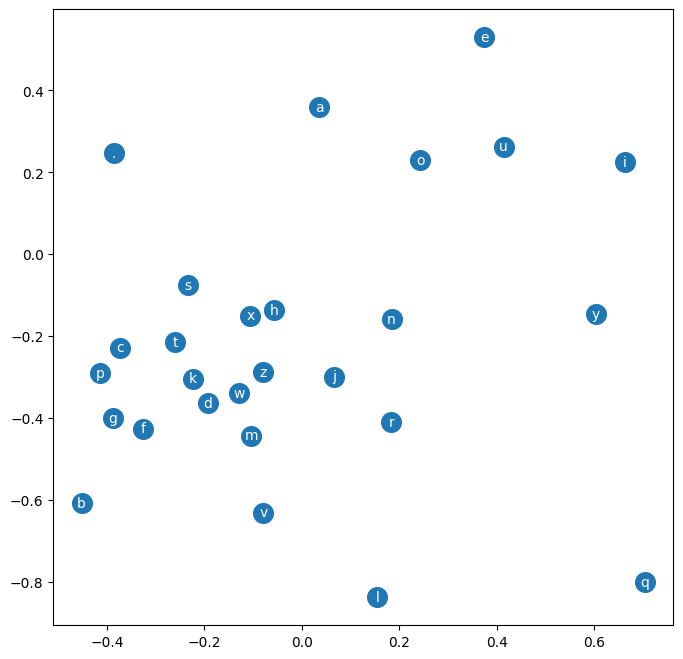

In [103]:
plt.figure(figsize=(8,8))
plt.scatter(c[:,0].data,c[:,1].data,s=200)
for i in range(c.shape[0]):
    plt.text(c[i,0].item(),c[i,1].item(),itos[i],ha='center',va='center',color='white')

In [35]:
# sample from the model

g=torch.Generator().manual_seed(2147483647+10)
for _ in range(10):
    out=[]
    context=[0]*block_size
    while True:
        emb=c[torch.tensor([context])]
        h=torch.tanh(emb.view(1,-1)@w1+b1)
        logits=h@w2+b2 
        probs=F.softmax(logits,dim=1) 
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break 
        
    

    print( ''.join(itos[i] for i in out))

mora.
mayah.
seel.
nihah.
lorethrej.
jerlee.
adelyn.
elin.
shi.
jen.
